## 패키지 설치

In [13]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import stemgraphic

# 3-4

### (b)

In [57]:
# 데이터 가져오기

data = pd.read_table("copier_maintenance.txt", header=None, names = ["minutes", "copiers"])

df = pd.DataFrame(data)

# df = df.sort_values(by='minutes',ascending=True)

df.head()

,minutes,copiers
0,20,2
1,60,4
2,46,3
3,41,2
4,12,1


Text(0.5, 0, 'Number of copiers')

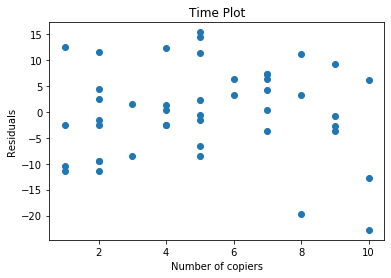

In [58]:
# 그래프 작성

x_values = df["copiers"][:, np.newaxis]
y_values = df["minutes"][:, np.newaxis]


model = LinearRegression()

model.fit(x_values, y_values)
y_pred = model.predict(x_values)

residuals = y_values - y_pred

scatter = plt.scatter(x_values, residuals)

plt.title("Time Plot")
plt.ylabel("Residuals")
plt.xlabel("Number of copiers")

### (c)

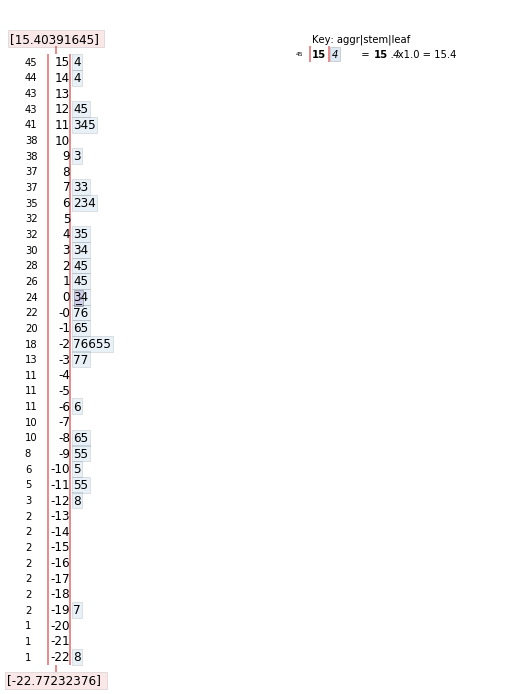

In [63]:
# stem and leaf 그래프(잔차)

x_values = df["copiers"][:, np.newaxis] # 카피머신 개수
y_values = df["minutes"][:, np.newaxis] # 서비스 시간

model = LinearRegression() # 회귀식

model.fit(x_values, y_values) # 학습

y_pred = model.predict(x_values) # 예측값

residuals = y_values - y_pred # 잔차 계산

fig, ax = stemgraphic.stem_graphic(residuals) # stem and leaf 그래프 그리는 함수

### (d)

Text(0.5, 0, 'y hat')

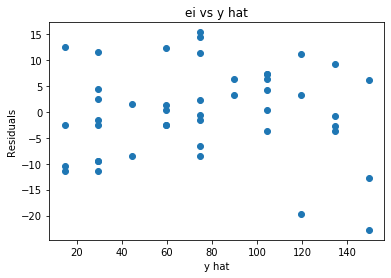

In [60]:
# 잔차 그래프

# ei vs y^

graph1 = plt.scatter(y_pred, residuals)

plt.title("ei vs y hat")
plt.ylabel("Residuals")
plt.xlabel("y hat")

Text(0.5, 0, 'xi')

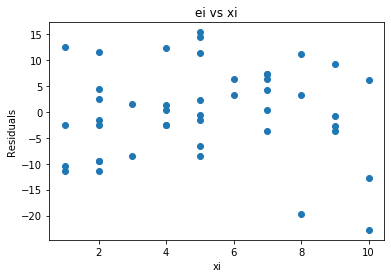

In [61]:
# ei vs x

graph2 = plt.scatter(x_values, residuals)

plt.title("ei vs xi")
plt.ylabel("Residuals")
plt.xlabel("xi")

#### 해석

y hat과 xi는 서로 상관관계가 있는 독립변수와 종속변수로서 45번의 시행이 있으니 그에 비례하게 x값이 그래프에 찍히게됩니다. 그리고 y축은 residuals(잔차) 로 동일하기에 결국 x의 값만 다를 뿐 그래프의 모양은 동일하게 나오게 됩니다.

### (e)

In [ ]:
# 정규 확률 그래프 그리기



### (h)

In [65]:
# 열 추가해서 비교

data2 = pd.read_table("Q3_4.txt", header = None, names = ["minutes", "copiers", "age", "year"])

df2 = pd.DataFrame(data2)

df2.head()

,minutes,copiers,age,year
0,20,2,20,4
1,60,4,19,5
2,46,3,27,4
3,41,2,32,1
4,12,1,24,4


Text(0.5, 0, 'x2(age)')

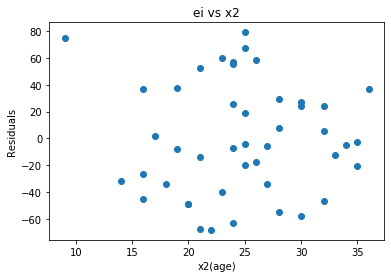

In [66]:
# residual vs x2(age)

x_values = df2["age"][:, np.newaxis]
y_values = df2["minutes"][:, np.newaxis]

model = LinearRegression() # 회귀식

model.fit(x_values, y_values) # 학습

y_pred = model.predict(x_values) # 예측값

residuals = y_values - y_pred # 잔차 계산

graph3 = plt.scatter(x_values, residuals)

plt.title("ei vs x2")
plt.ylabel("Residuals")
plt.xlabel("x2(age)")

Text(0.5, 0, 'x3(year)')

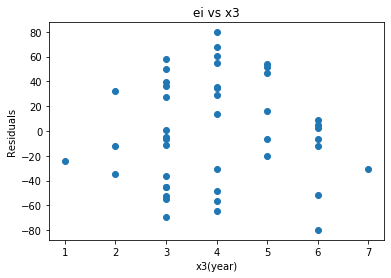

In [67]:
# residuals vs x3(year)

x_values = df2["year"][:, np.newaxis]
y_values = df2["minutes"][:, np.newaxis]

model = LinearRegression() # 회귀식

model.fit(x_values, y_values) # 학습

y_pred = model.predict(x_values) # 예측값

residuals = y_values - y_pred # 잔차 계산

graph3 = plt.scatter(x_values, residuals)

plt.title("ei vs x3")
plt.ylabel("Residuals")
plt.xlabel("x3(year)")